# Machine learning workflow summary / 機械学習ワークフローの概要

In this section, we use one more example to summarize the machine learning workflow from start to end.

When applying machine learning to a problem the main steps are typically:
1. Getting the data
2. Exploring the data
3. Preparing the data for learning
4. Trying (several) machine learning algorithms
5. Choose the most appropriate algorithm, and when necessary fine tune it

このセクションでは、更にもう1つの例を挙げて、機械学習ワークフローを最初から最後までの流れを説明します。

問題に機械学習を適用する場合、主な手順は通常次のとおりです。
1. データの取得
2. データの探索・可視化
3. 学習のためのデータの準備
4. （いくつかの）機械学習アルゴリズムを試す
5. 最も適切なアルゴリズムを選択し、必要に応じて微調整

This is similar to the workflow that we used for the iris dataset and the MNIST dataset.

上記は、アヤメのデータセットとMNISTデータセットに使用したワークフローと同様です。

## 1. Getting the data / データの取得

To train a classifier we need "enough" good examples, otherwise the classifier might not performs well.
<br>
Thus, the creation of the dataset is a very important, if not the most important, step in the machine learning workflow.

Sometimes you might have data readily available. But frequently you will have to create the dataset yourself.
<br>
Creating a dataset by getting and labelling data is often _the most time (and money) consuming part_ of the machine learning workflow.

分類子をトレーニングするには、「十分に」良い例が必要です。そうでない場合、分類のいい結果が出ない可能性があります。
<br>
したがって、データセットの作成は、機械学習ワークフローにおける非常に重要な段階です。

データが手元にありすぐに利用できる場合があります。しかし、頻繁に自分でデータセットを作成する必要があります。
<br>
多くの場合、データを取得してラベルを付けることでデータセットを作成することは、機械学習ワークフローの_時間（およびお金）を最も多く消費する_段階です。

Here we will use the wine quality dataset from https://archive.ics.uci.edu/ml/datasets/Wine. The direct link to the data file is: http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data (in CSV format). The dataset contains samples of 3 different wines (first value in each line), and their features (remaining 13 values - see the webpage for their descriptions).

ここでは、https://archive.ics.uci.edu/ml/datasets/Wine にあるワインの種類のデータセットを使用します。ファイルへの直接リンクは、http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data （CSV形式）です。データセットには、3つの異なる種類のワインのサンプルが入っています。各行の最初の値はワインの種類、残りの13の値はそのサンプルで測定した特徴です。（特徴の説明についてはWebページを参照）

The following command downloads the file. It should work on Mac and Linux, but it might not work on Windows. If it doesn't work, download the file manualy and save it to the same folder as this notebook (.../day1/).

次のコマンドは、ファイルをダウンロードします。MacとLinuxでは動作するはずですが、Windowsでは動作しない場合があります。動作しない場合は、ファイルを手動でダウンロードし、このノートブックと同じフォルダ（... / day1 /）に保存してください。

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2020-04-28 15:49:43--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 10782 (11K) [application/x-httpd-php]
`wine.data' に保存中

wine.data           100%[===================>]  10.53K  20.1KB/s 時間 0.5s       

2020-04-28 15:49:46 (20.1 KB/s) - `wine.data' へ保存完了 [10782/10782]



Then load the data.

そして、データを読み込みましょう。

In [2]:
import numpy as np

wine = np.genfromtxt('wine.data', delimiter=',')

## 2. Exploring the data / データの探索

Let's try plotting the data. This could give us a sense:
- how difficult might be to classify this data, and 
- which features might be important.

First let us check the 3 values for the wine type in the first column.

データをプロットしてみましょう。それによって以下のことに対しての感覚を与えるかもしれません。

- このデータを分類するのがどれほど難しいか
- どの特徴がより重要である

最初に、第１列のワインの3つの書類の値を確認しましょう。

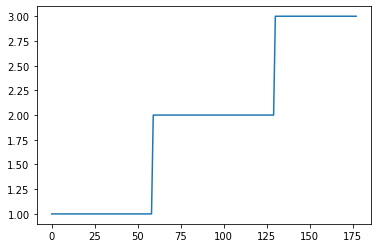

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(wine[:,0])

The values are 1, 2 and 3.
<br>
値は1、2、3です。

We can now try plotting a feature. For example, let's see what values the last feature (proline) has for different wine types.
<br>
それでは、特徴をプロットしてみましょう。たとえば、一番最後の特徴（プロリン）がさまざまな種類のワインに対してどのような値を持つかを見てみましょう。

Text(0, 0.5, 'proline')

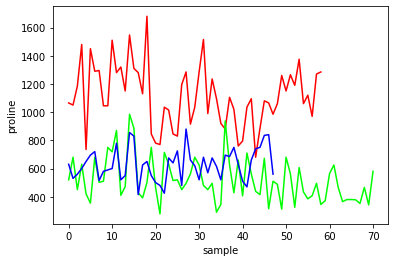

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(wine[wine[:,0] == 1,13], color=[1,0,0])
plt.plot(wine[wine[:,0] == 2,13], color=[0,1,0])
plt.plot(wine[wine[:,0] == 3,13], color=[0,0,1])
plt.xlabel("sample")
plt.ylabel("proline")

Showing the histograms might be better.

ヒストグラムを表示したほうがわかりやすいかもしれません。

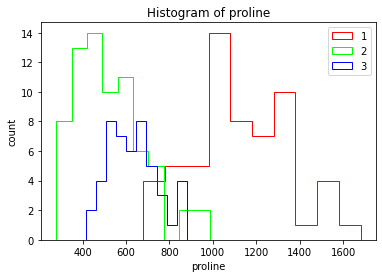

In [5]:
plt.hist(wine[wine[:,0] == 1,13], histtype='step', color=[1, 0, 0], label="1")
plt.hist(wine[wine[:,0] == 2,13], histtype='step', color=[0, 1, 0], label="2")
plt.hist(wine[wine[:,0] == 3,13], histtype='step', color=[0, 0, 1], label="3")
plt.xlabel("proline")
plt.ylabel("count")
plt.title("Histogram of proline")
plt.legend()

As you can see, proline has quite different values for wine type number 1, so it might be a useful feature for the classification.

ご覧のように、ワイン種類1のプロリンの値は他の種類と随分異なるようです。そのため、分類に使えば役に立つと考えられます。

## 3. Preparing the data / データの準備

Create the training and testing datasets and standardize the data.

トレーニングとテストのデータセットを作成し、データを標準化しましょう。

In [6]:
X = wine[:,1:] # features
y = wine[:,0] # labels

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print("X train size:", X_train.shape[0], "  X test size:", X_test.shape[0])

# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X train size: 124   X test size: 54


## 4. Training the classifer / 分類器の学習


We will use another classifier provided by `sklearn`, a __Perceptron__ model from the package `sklearn.linear_model` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)).

`sklearn`によって提供される別の分類器、パッケージ` sklearn.linear_model`からの__Perceptron__モデルを使用します（[ドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)）。

In [7]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()

For training we use `fit` as in previously used classifiers (conviniently, all machine learning models in `sklearn` use the same functions).

学習させるには、以前と同様に分類器の`fit`関数を使用します（`sklearn`のすべての機械学習モデルは同じ関数を使用しています）。

In [8]:
perceptron.fit(X_train, y_train);

Now we can predict the label for the testing set in order to check if the classifier is good.

これで、分類器が適切かどうかを確認するために、テストセットのラベルを予測できます。

In [9]:
y_pred = perceptron.predict(X_test)

Let us compute the confusion matrix and print the accuracy.

混同行列と精度も計算してみましょう。

In [10]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[17  0  0]
 [ 1 17  1]
 [ 0  0 18]]


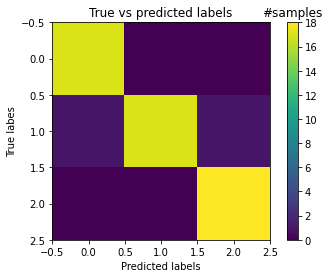

In [11]:
plt.imshow(CM)
plt.xlabel("Predicted labels")
plt.ylabel("True labes")
plt.title("True vs predicted labels")
cbar = plt.colorbar()
cbar.ax.set_title("#samples", rotation=0);

In [12]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test,  y_pred)
print("Accuracy = ", A)

Accuracy =  0.9629629629629629


The data is relatively easy to classify, so we can get perfect accuracy or very close to that.

データの分類は比較的簡単なので、完全な精度（100％）またはそれに近い精度を得ることができます。

## 5. Choosing best classifier and fine tuning / 最適な分類器の選択と微調整



Although we will not do it here for this simple problem, in a more complex machine learning task we would usually try multiple classifiers. 
<br>
Moreover, for the best performing classifer we would try to change the classifier _hyperparameters_ to obtain the best performance.

If you want to find more, we recommend that you read a good book on practical machine learning. Below are some recommendations.

ここで使った簡単なデータセットでは行いませんが、より複雑な機械学習タスクでは、通常、複数の分類器を試します。
<br>
さらに、一番良いパフォーマンスの分類器については、分類器のパラメータ（いわゆる_ハイパーパラメーター_）を変更して最高のパフォーマンスを取得しようとします。

もっと知りたい場合は、実践機械学習に関する本を読むことをお勧めします。以下はいくつかの推奨書籍です。

## Try  it yourself ! (optional)

[Click here](session6-playground.ipynb) to open a sample notebook to do the workflow on a different dataset that you choose.

## Books to learn more / 更に学ぶための本 (optional)

There are many books on the theory of machine learning. 
<br>
For practical machine learning we recommend the following books. Jupyter notebooks for them are also available.

機械学習の理論に関する本はたくさんあります。
<br>
機械学習の実践には、以下の書籍をお勧めします。全ての本にはJupyterノートブックが付いています。

- [Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.amazon.co.jp/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646) (Second edition)<br>
(第2版はまだ日本語に翻訳されてないようですが、第１版はこちらです：[scikit-learnとTensorFlowによる実践機械学習](https://www.amazon.co.jp/scikit-learnとTensorFlowによる実践機械学習-Aurélien-Géron/dp/4873118344/))

    - Jupyter notebooks: https://github.com/ageron/handson-ml

- [Raschka, Mirjalili - Python Machine Learning](https://www.amazon.co.jp/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1789955750/) (3rd edition)<br>
(和訳は第2版です：[Python 機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/gp/product/4295003379/))
    - Jupyter notebooks: https://github.com/rasbt/python-machine-learning-book-3rd-edition

- [Chollet - Deep Learning with Python](https://www.amazon.co.jp/dp/1617294438/)
(日本語版のタイトル： PythonとKerasによるディープラーニング)
    - mainly for the Day 2 contents (neural networks using Keras) / 主に2日目の内容（Kerasを使用したニューラルネットワーク）
    - Jupyter notebooks: https://github.com/fchollet/deep-learning-with-python-notebooks